# Gwydir Water Delivery
In preparation for Thursdays meeting at CEWO it would be great if DEA could look at a current environmental water delivery action  in the lower Gwydir ramsar sites. This will satisfy two needs; ramsar obligations and communications of current environmental water deliveries.

This action commenced on 19/07/18 and ended around 21/10/18.

I have attached shapefiles which contain the four Ramsar Wetlands as well as the wetland classifications for the Gwydir management area.  

Some outputs could include:  

before-during-after inundation of the ramsar wetlands.  
Chart showing the change in inundated area over time (classified 0% t0 100%) again before-during-after the inundation action
the proportion of open water vs inundated veg over time
The frequency of inundation over the full landsat/sentinel record for both the ramsar wetland units and vegetation types within each of the ramsar wetlands.



In [1]:
# Import modules
import datacube 
import sys
import xarray as xr
import numpy as np
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patheffects as PathEffects
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from skimage import exposure
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datetime import datetime, timedelta

# Import external dea-notebooks functions using relative link to Scripts directory
sys.path.append('../../10_Scripts')
import DEADataHandling
import DEAPlotting
import TasseledCapTools
import animate_shp

# Set up datacube instances
dc = datacube.Datacube(app='Time series animation')
s2dc = datacube.Datacube(config='/g/data/r78/dc_configs/sentinel2.conf')

In [2]:
# Study area name used for output file
study_area = 'gwydir'

# Thresholds used for cloud masking (Sentinel 2 is more aggressive)
#landsat_masked_prop = 0.99
#sentinel_masked_prop = 0.90

# # Set up analysis data query using a buffer around a lat-long point
# lat, lon, buffer = -19.687655, 145.405052, 500
# x, y = geometry.point(lon, lat, CRS('WGS84')).to_crs(CRS('EPSG:3577')).points[0]
# query = {'x': (x - buffer, x + buffer),
#          'y': (y - buffer, y + buffer),    
#          'time': ('2015-01-01', '2018-07-30'),
#          'crs': 'EPSG:3577'}

resolution =25

#Query for Gwydir
# query = dict(x=(148.727149, 149.847691), 
#              y=(-29.000326, -29.714816),
#              resolution=(-resolution, resolution),
#              output_crs='EPSG:3577',
#              time=('2018-06-30', '2019-01-01'))

#Query for Gwydir (smaller)
query = dict(x=(149.050111, 149.470493), 
             y=(-29.139622, -29.480077),
             resolution=(-resolution, resolution),
             output_crs='EPSG:3577',
             time=('2018-06-20', '2019-01-01'))


%load_ext autoreload
%autoreload 2

## Extract cloud-free clear Landsat and Sentinel observations
Use the `load_clearlandsat` function to load Landsat observations and PQ data for multiple sensors (i.e. ls5, ls7, ls8), and return a single xarray dataset containing only observations that contain greater than a specified proportion of clear pixels. 

Load in Sentinel data for S2A and S2B.

In [3]:
# Custom mask that includes only cloudy or cloud shadowed pixels with data for all bands
custom_mask = {'cloud_acca': 'no_cloud', 
               'cloud_fmask': 'no_cloud', 
               'cloud_shadow_acca': 'no_cloud_shadow',
               'cloud_shadow_fmask': 'no_cloud_shadow',
               'contiguous': True}

# Load in data
ls578_ds = DEADataHandling.load_clearlandsat(dc=dc, query=query, product='nbart', 
                                        #bands_of_interest=['green', 'nir', 'swir1', 'red'], 
                                        masked_prop=0, mask_dict=custom_mask)#, apply_mask=False)  

Loading ls5 pixel quality
    Skipping ls5; no valid data for query
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 0 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 16 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [4]:
print(ls578_ds.time)

<xarray.DataArray 'time' (time: 16)>
array(['2018-06-26T23:53:53.500000000', '2018-07-04T00:00:08.000000000',
       '2018-07-12T23:54:02.000000000', '2018-07-20T00:00:15.000000000',
       '2018-07-28T23:54:08.000000000', '2018-08-05T00:00:23.500000000',
       '2018-08-13T23:54:18.000000000', '2018-08-21T00:00:32.000000000',
       '2018-08-29T23:54:25.000000000', '2018-09-06T00:00:38.000000000',
       '2018-09-14T23:54:30.000000000', '2018-09-22T00:00:42.500000000',
       '2018-09-30T23:54:37.000000000', '2018-10-08T00:00:51.000000000',
       '2018-10-16T23:54:43.500000000', '2018-10-24T00:00:56.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-06-26T23:53:53.500000 ... 2018-10-24T00:00:56


### Make false color image of the Gwydir ramsar sites before, during, after the environmental flow release

<xarray.DataArray 'time' ()>
array('2018-07-12T23:54:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-07-12T23:54:02


<Figure size 432x288 with 0 Axes>

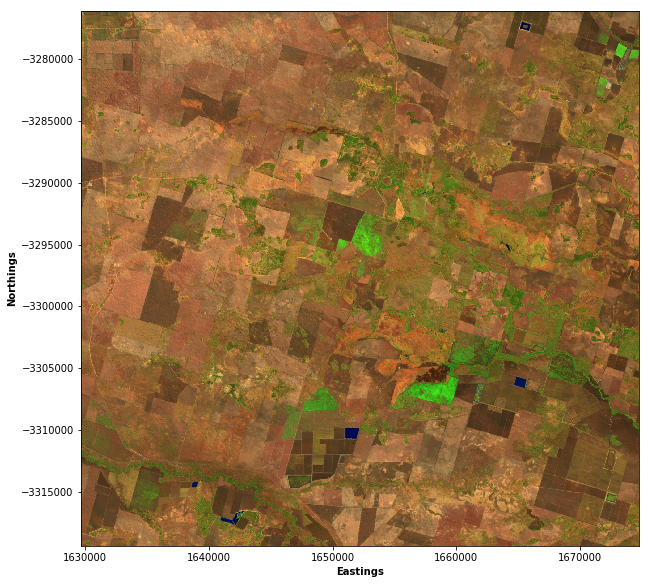

In [5]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=2), bands=['swir1','nir','green'])
print(ls578_ds.time[2])

<xarray.DataArray 'time' ()>
array('2018-08-13T23:54:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-08-13T23:54:18


<Figure size 432x288 with 0 Axes>

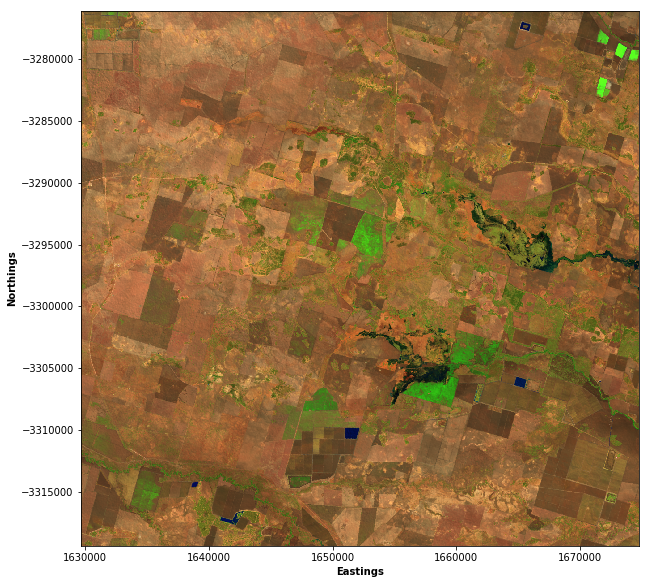

In [6]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=6), bands=['swir1','nir','green'])
print(ls578_ds.time[6])

<xarray.DataArray 'time' ()>
array('2018-08-29T23:54:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-08-29T23:54:25


<Figure size 432x288 with 0 Axes>

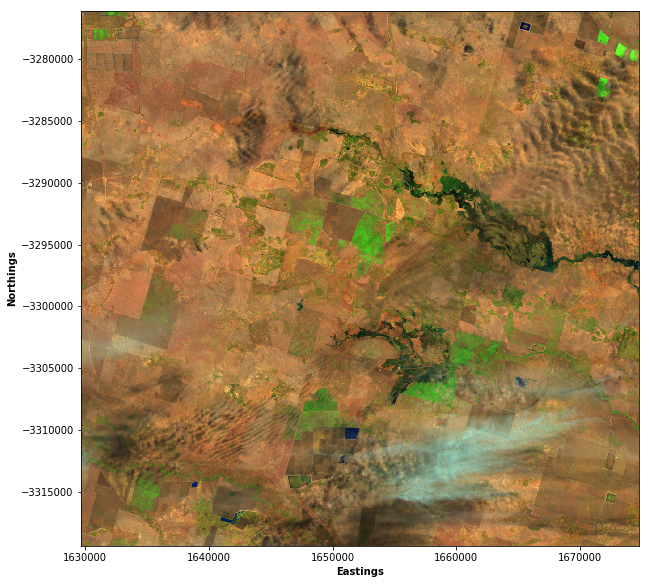

In [7]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=8), bands=['swir1','nir','green'])
print(ls578_ds.time[8])

<xarray.DataArray 'time' ()>
array('2018-09-14T23:54:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-09-14T23:54:30


<Figure size 432x288 with 0 Axes>

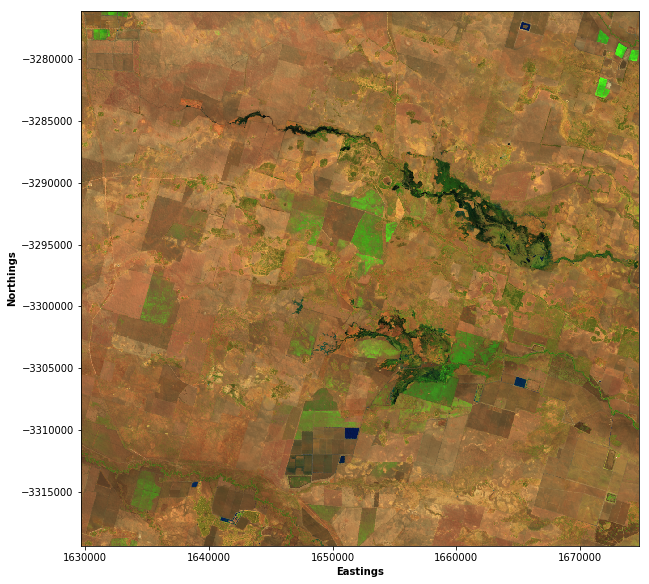

In [8]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=10), bands=['swir1','nir','green'])
print(ls578_ds.time[10])

<xarray.DataArray 'time' ()>
array('2018-09-30T23:54:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-09-30T23:54:37


<Figure size 432x288 with 0 Axes>

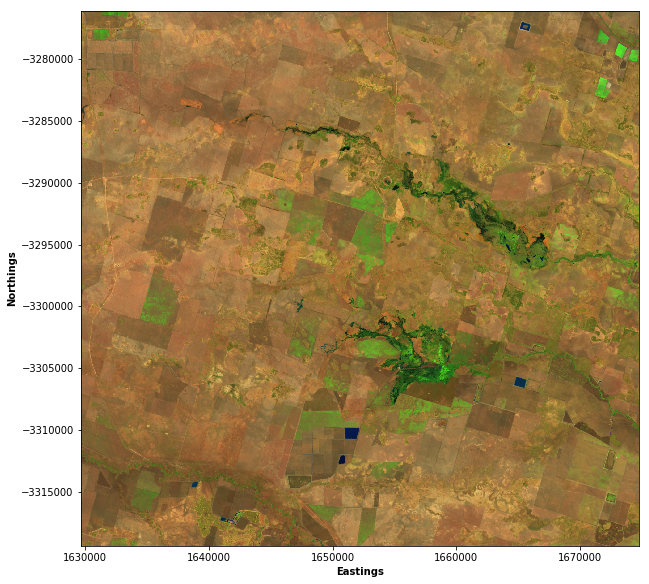

In [9]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=12), bands=['swir1','nir','green'])
print(ls578_ds.time[12])

<xarray.DataArray 'time' ()>
array('2018-10-16T23:54:43.500000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-10-16T23:54:43.500000


<Figure size 432x288 with 0 Axes>

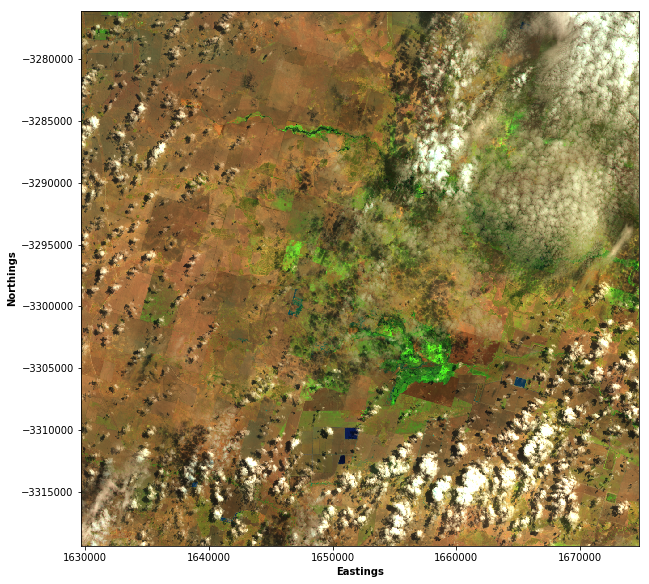

In [10]:
plt.clf()
DEAPlotting.three_band_image(ls578_ds.isel(time=14), bands=['swir1','nir','green'])
print(ls578_ds.time[14])

In [11]:
ls578_ds = DEADataHandling.load_clearlandsat(dc=dc, query=query, product='nbart', masked_prop=0.5) 

Loading ls5 pixel quality
    Skipping ls5; no valid data for query
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 0 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 6 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [12]:
tci = TasseledCapTools.thresholded_tasseled_cap(ls578_ds, wetness_threshold=-450, drop_tc_bands=False)

In [13]:
tci.wetness_thresholded.min()

<xarray.DataArray 'wetness_thresholded' ()>
array(-449.995)

In [14]:
tci.wetness_thresholded.max()

<xarray.DataArray 'wetness_thresholded' ()>
array(1321.8543)

In [15]:
ls578_ds.blue.shape

(6, 1732, 1806)

In [16]:
tci.wetness_thresholded.shape

(6, 1732, 1806)

<Figure size 432x288 with 0 Axes>

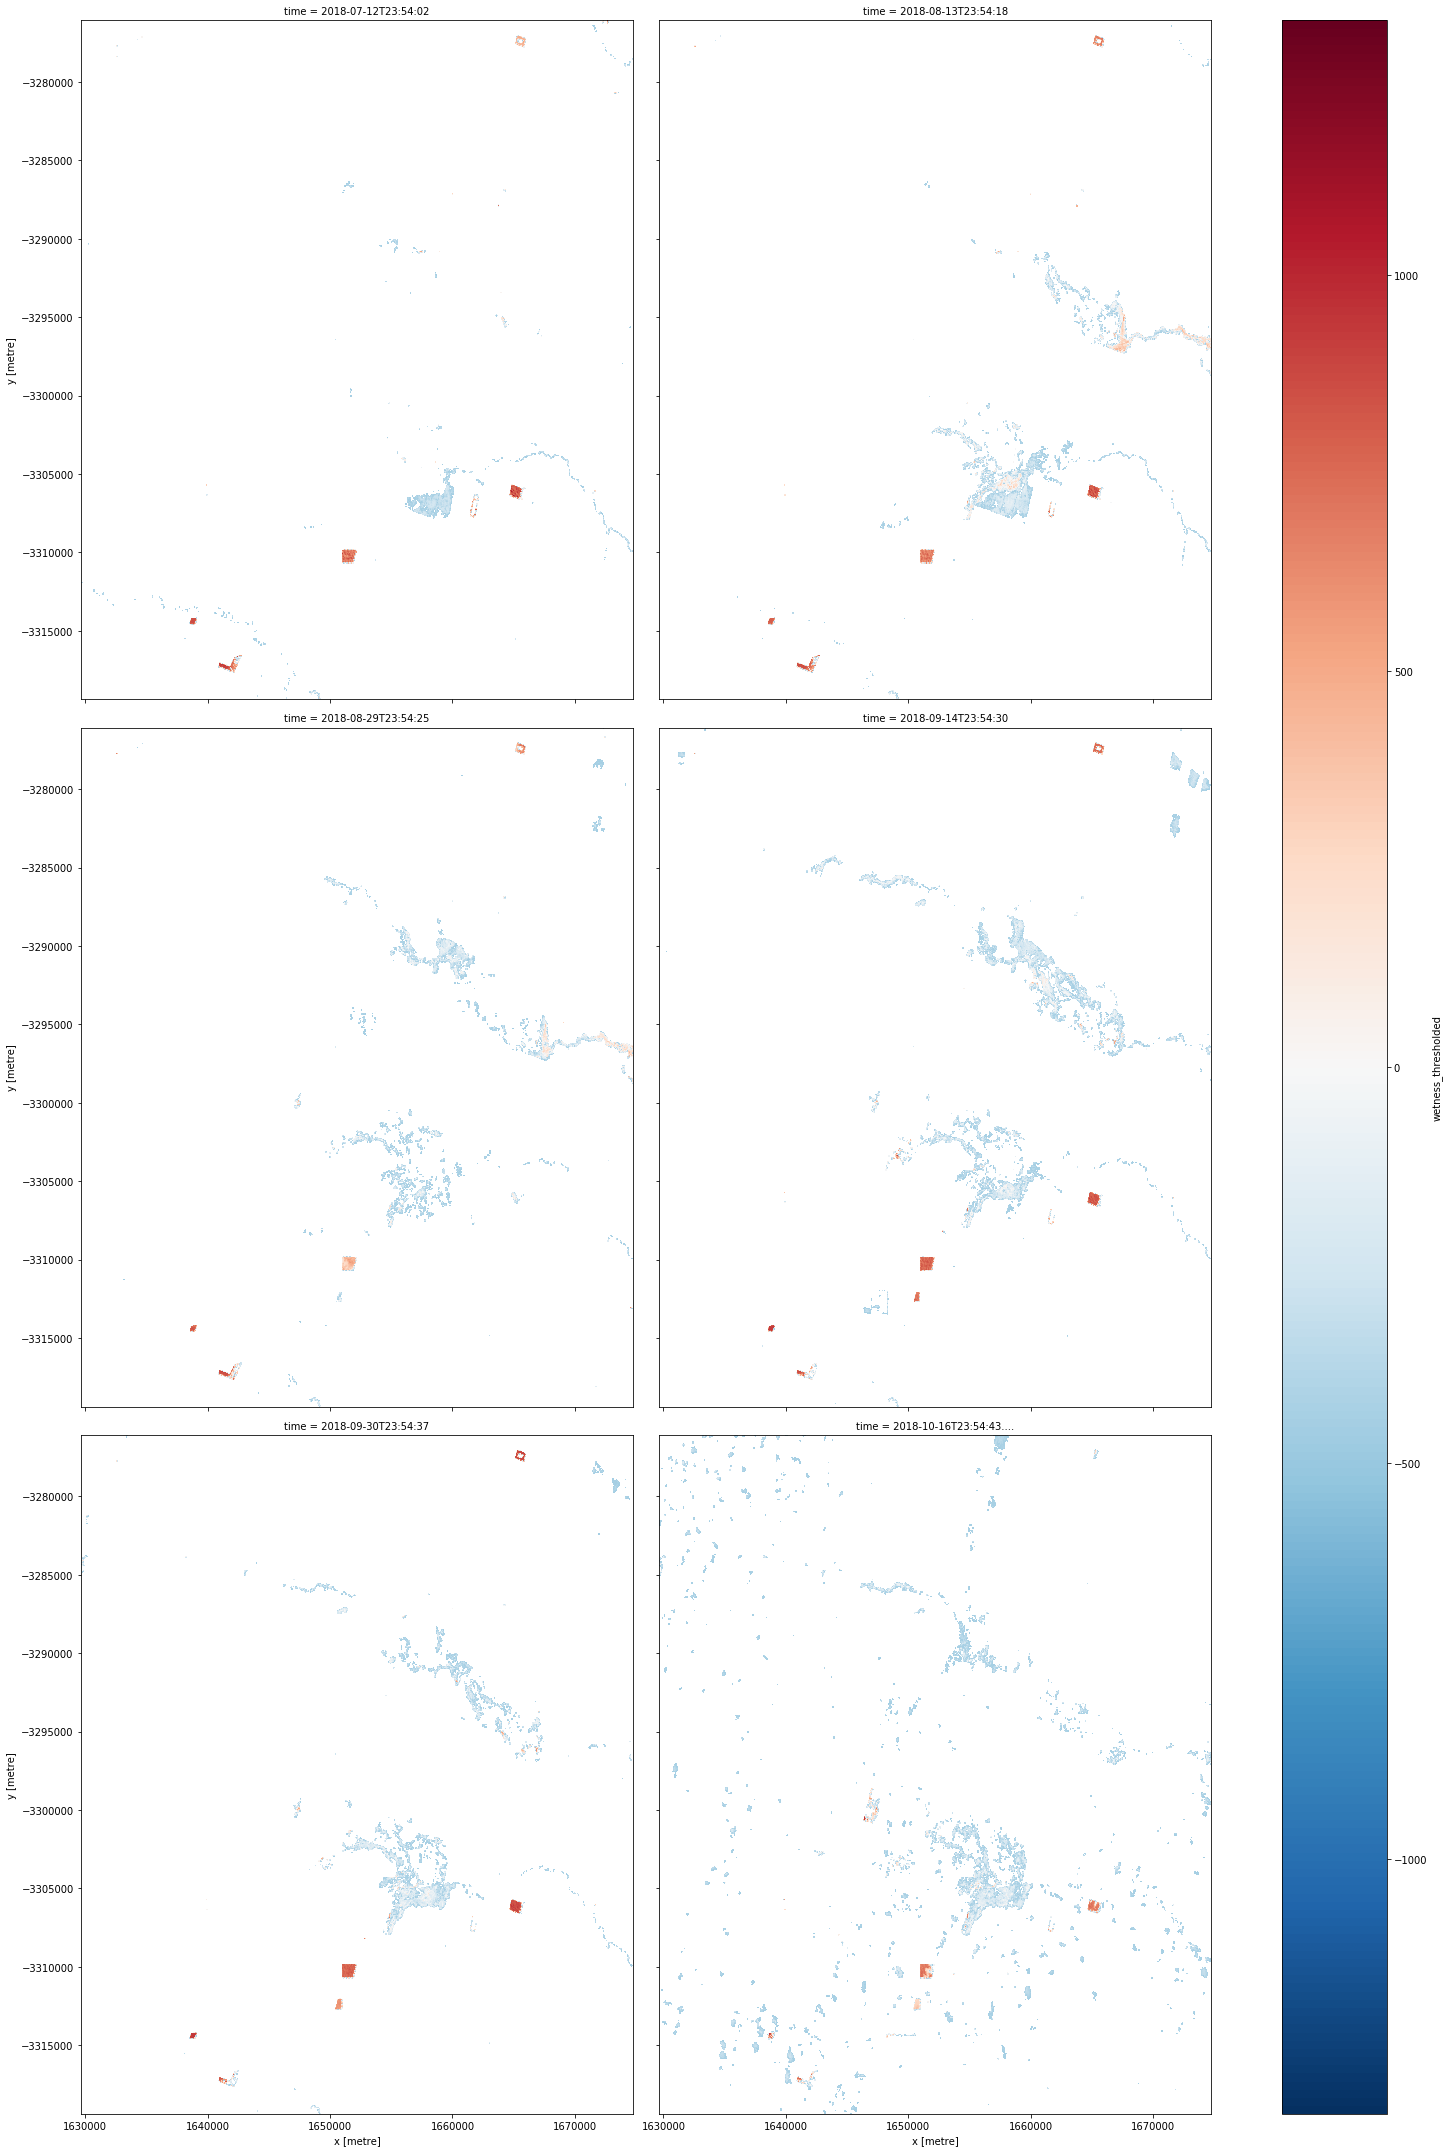

In [17]:
plt.clf()
tci.wetness_thresholded.plot(col='time', col_wrap=2, size=10)#, vmin=-450, vmax=450, cmap ='viridis_r',
                           # )


In [18]:
print(tci.time)

<xarray.DataArray 'time' (time: 6)>
array(['2018-07-12T23:54:02.000000000', '2018-08-13T23:54:18.000000000',
       '2018-08-29T23:54:25.000000000', '2018-09-14T23:54:30.000000000',
       '2018-09-30T23:54:37.000000000', '2018-10-16T23:54:43.500000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-07-12T23:54:02 ... 2018-10-16T23:54:43.500000


/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Generating 6 frame animation
    Exporting animation to gwydir_ls_tci_1.gif


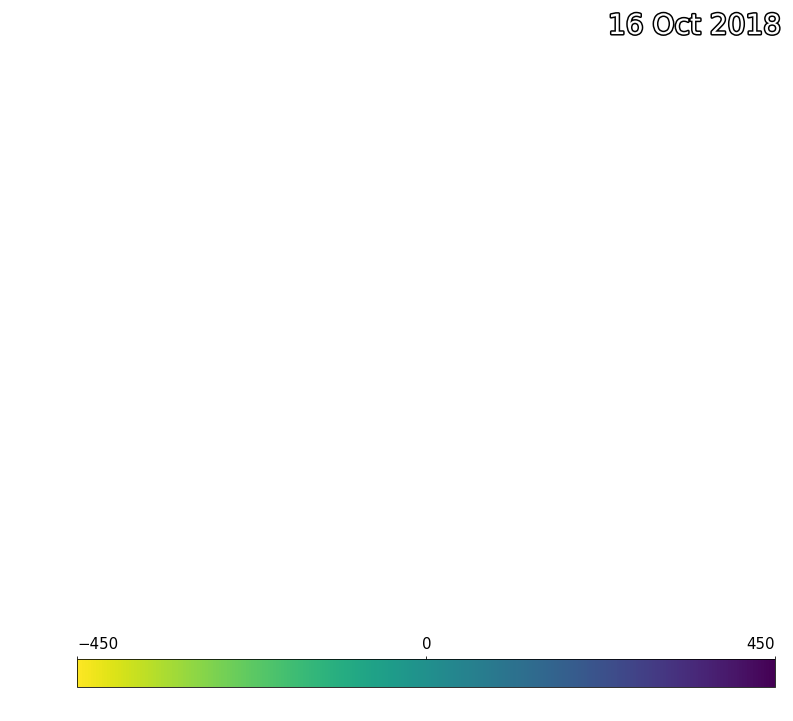

In [19]:
DEAPlotting.animated_timeseries(ds=tci,
            output_path='{}_ls_tci_1.gif'.format(study_area), 
            width_pixels=1000, interval=200, bands=['wetness_thresholded'],show_date=True, 
            onebandplot_cbar=True, onebandplot_kwargs={'cmap':'viridis_r','vmin':-450,
            'vmax':450},shapefile_path=None, shapefile_kwargs={})

## Plot data as animation

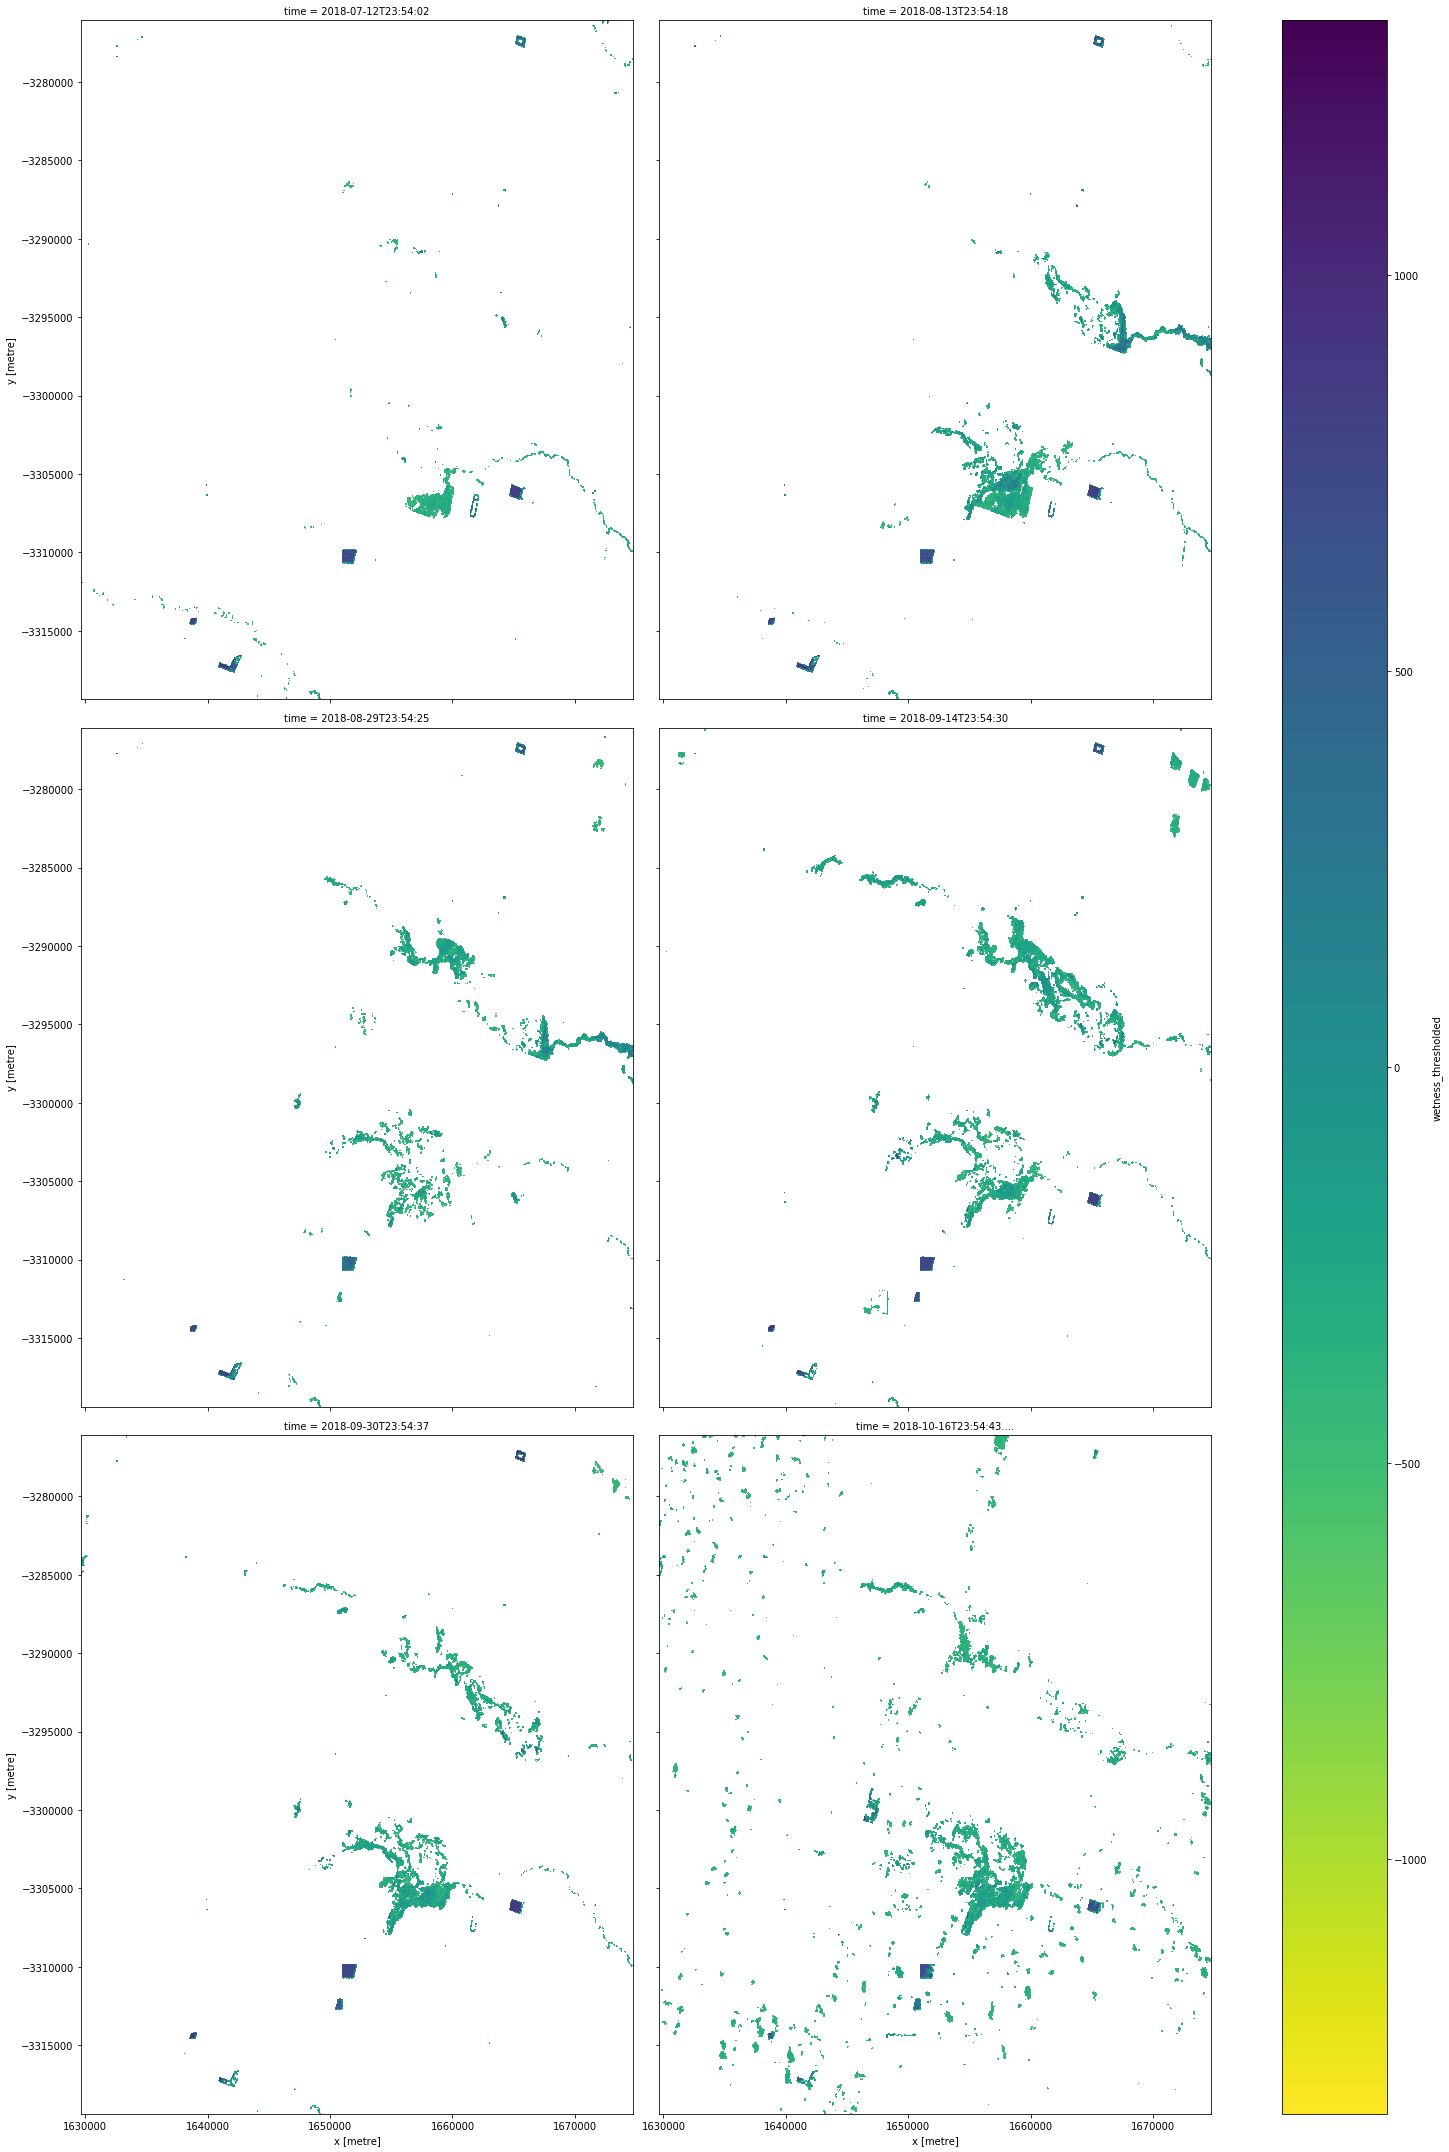

In [20]:
tci.wetness_thresholded.plot(col='time', col_wrap=2, size=10, cmap ='viridis_r',
                            ) # vmin=-450, vmax=450,

In [21]:
tci.wetness

<xarray.DataArray 'wetness' (time: 6, y: 1732, x: 1806)>
array([[[-2913.8965, -3083.3631, ..., -2421.8324, -2481.6437],
        [-2814.4205, -2994.0863, ..., -2376.3941, -2337.7764],
        ...,
        [-2126.5179, -2018.3293, ..., -2455.2062, -2444.3217],
        [-2151.3995, -2022.3783, ..., -2413.2792, -2389.5845]],

       [[-2977.1813, -3160.1536, ..., -2521.8921, -2432.3374],
        [-2883.8295, -3115.0513, ..., -2491.0336, -2395.1171],
        ...,
        [-2231.4793, -2159.1119, ..., -2576.6232, -2553.731 ],
        [-2241.4375, -2121.7299, ..., -2513.9615, -2505.0196]],

       ...,

       [[-2885.7339, -3014.003 , ..., -2494.0873, -2543.4355],
        [-2861.5105, -3004.8526, ..., -2478.4541, -2459.8711],
        ...,
        [-2539.2393, -2442.3736, ..., -2079.5467, -2179.6716],
        [-2618.3806, -2422.9761, ..., -2050.3219, -2157.1462]],

       [[-1003.8984, -1631.2839, ..., -1659.3596, -1768.1227],
        [-1202.6569, -1706.2333, ..., -1126.9408, -1439.8764],
   

In [22]:
tci =tci.fillna(-999)

In [23]:
tci.wetness_thresholded.max()

<xarray.DataArray 'wetness_thresholded' ()>
array(1321.8543)

Generating 6 frame animation (i.e. timesteps in shortest dataset)
    Exporting animation to gwydir_ls_fc_vs_tci_8.mp4


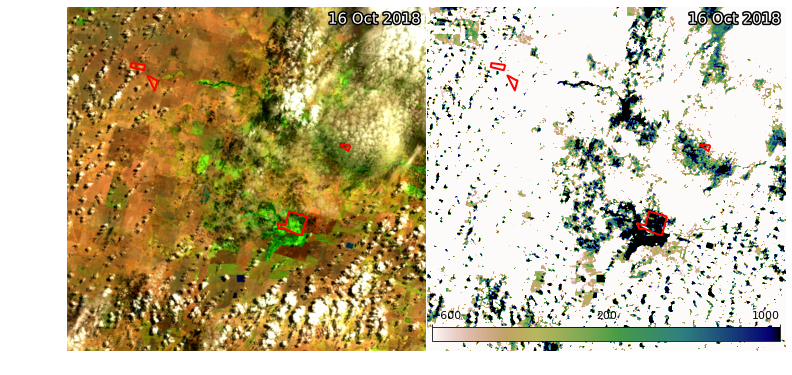

In [24]:
DEAPlotting.animated_doubletimeseries(ds1=ls578_ds, ds2=tci,
            output_path='{}_ls_fc_vs_tci_8.mp4'.format(study_area), 
            width_pixels=1000, interval=200, bands1=['swir1', 'nir', 'green'],
                                      bands2=['wetness'],
            show_date1=True, show_date2=True,
            onebandplot_cbar1=False, onebandplot_cbar2=True,
            onebandplot_kwargs2={'cmap':'gist_earth_r','vmin':-600,
            'vmax':1000},shapefile_path1='/g/data/r78/rjd547/Gwydir/Cewo_Gwydir/Ramsar_gwydir_albers.shp',
            shapefile_path2='/g/data/r78/rjd547/Gwydir/Cewo_Gwydir/Ramsar_gwydir_albers.shp', 
            shapefile_kwargs1={'linewidth':2, 'edgecolor':'red', 'facecolor':"#00000001"},
        shapefile_kwargs2={'linewidth':2, 'edgecolor':'red', 'facecolor':"#00000001"},
            annotation_kwargs1={}, annotation_kwargs2={})

In [25]:
import geopandas as gpd
ramsars = gpd.read_file('/g/data/r78/rjd547/Gwydir/Cewo_Gwydir/Ramsar_gwydir.shp')

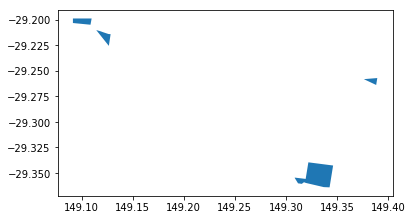

In [26]:
ramsars.plot()

In [25]:
!ls

Gwydir_Current_Environmental_Water_Delivery.ipynb
gwydir_ls_fc_vs_tci_1.gif
gwydir_ls_fc_vs_tci_2.gif
gwydir_ls_fc_vs_tci_3.gif
gwydir_ls_fc_vs_tci_4.gif
gwydir_ls_fc_vs_tci_5.gif
gwydir_ls_fc_vs_tci_6.gif
gwydir_ls_fc_vs_tci_7.gif
gwydir_ls_fc_vs_tci_8.gif
gwydir_ls_fc_vs_tci_8.mp4
gwydir_ls_tci_1.gif
PlottingAnimatedGifs_sentinel2andlandsat-HattahLakes-HackWeek.ipynb
PlottingAnimatedGifs_sentinel2andlandsat-HattahLakes.ipynb
PlottingAnimatedGifs_sentinel2andlandsat-MacMarsh.ipynb
PlottingAnimatedGifs_sentinel2andlandsat-MacMarsh-wetness.ipynb
PlottingAnimatedGifs_sentinel2andlandsat-Pine_tree.ipynb
PlottingAnimatedGifs_sentinel2andlandsat_wetnesss.ipynb
_tmp0000000.png
_tmp0000001.png
_tmp0000002.png
_tmp0000003.png
_tmp0000004.png
_tmp0000005.png


In [27]:
import pyproj
pyproj.transform()

TypeError: transform() missing 4 required positional arguments: 'p1', 'p2', 'x', and 'y'